<a href="https://colab.research.google.com/github/Jigyasha17/Projects/blob/main/E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [67]:
df=pd.read_csv("/content/Sample - Superstore.csv", encoding="latin-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [69]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [70]:
df.shape

(9994, 21)

In [71]:
df.drop_duplicates().shape

(9994, 21)

In [72]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [73]:
df['Order Date']=pd.to_datetime(df["Order Date"])

In [74]:
df['Ship Date']=pd.to_datetime(df["Ship Date"])

In [75]:
df['order_by_month']=df['Order Date'].dt.month
df['order_by_year']=df['Order Date'].dt.year
df['order_by_weekday']=df['Order Date'].dt.day_of_week

In [76]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_by_month,order_by_year,order_by_weekday
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [ ]:
sales_by_month=df.groupby('order_by_month')['Sales'].sum()

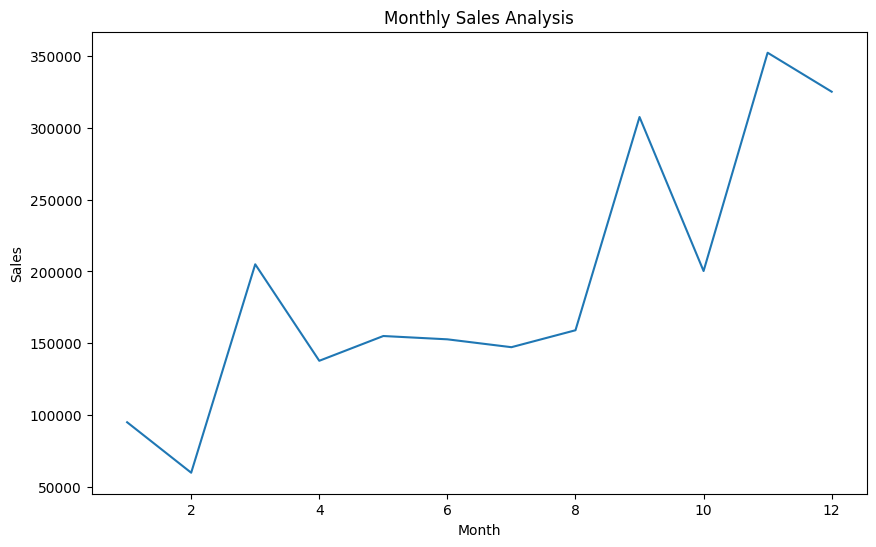

In [103]:
plt.figure(figsize=(10,6))
sales_by_month_df = sales_by_month.reset_index()
sales_by_month_df.columns = ['Month', 'Sales']
sns.lineplot(x='Month', y='Sales', data=sales_by_month_df)
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [78]:
sales_by_category=df.groupby('Category')['Sales'].sum()

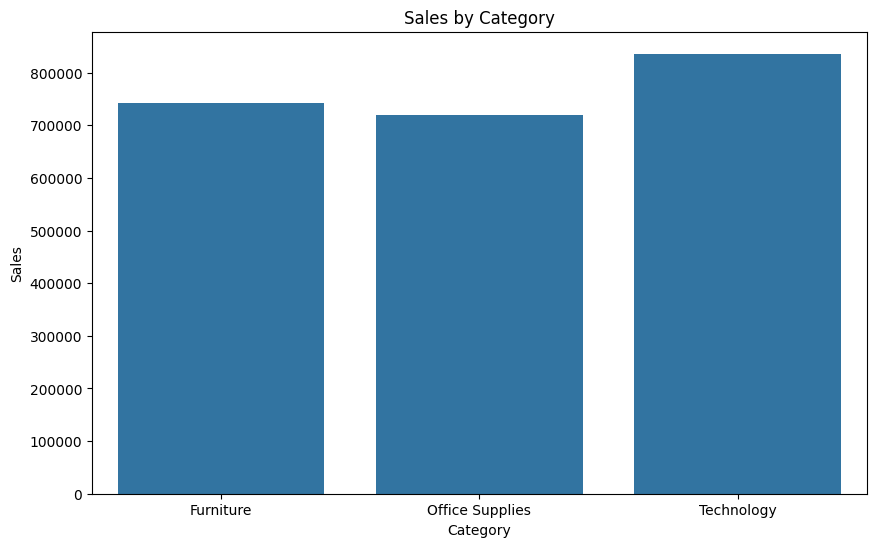

In [104]:
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_category.index, y='Sales', data=sales_by_category.reset_index())
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

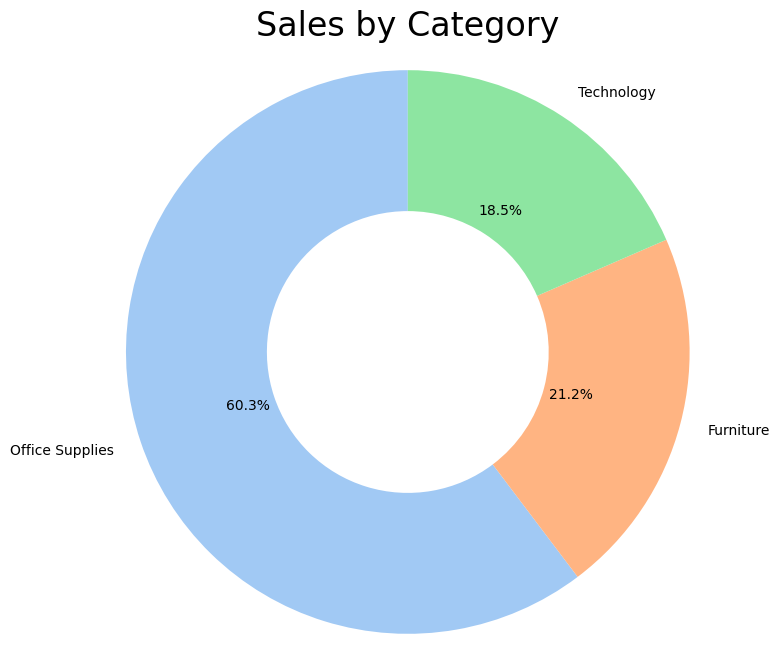

In [109]:
plt.figure(figsize=(8, 8))
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops={'width': 0.5})
plt.title('Sales by Category', fontsize=24)
plt.axis('equal')
plt.show()

In [81]:
sales_by_sub_category=df.groupby('Sub-Category')['Sales'].sum()

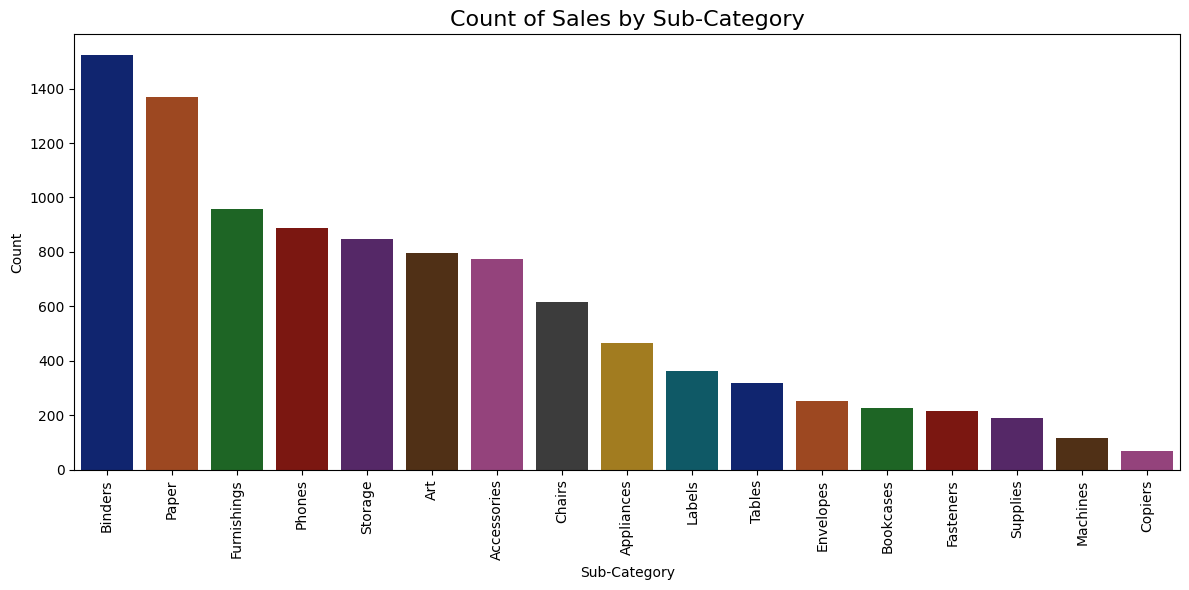

In [122]:
plt.figure(figsize=(12, 6)) # Increased figure size for better readability
sns.barplot(x=df['Sub-Category'].value_counts().index, y=df['Sub-Category'].value_counts().values, palette='dark', hue=df['Sub-Category'].value_counts().index, legend=False)
plt.title('Count of Sales by Sub-Category', fontsize=16) # Changed title to reflect counts
plt.xlabel('Sub-Category')
plt.ylabel('Count') # Changed y-label to reflect counts
plt.xticks(rotation=90) # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

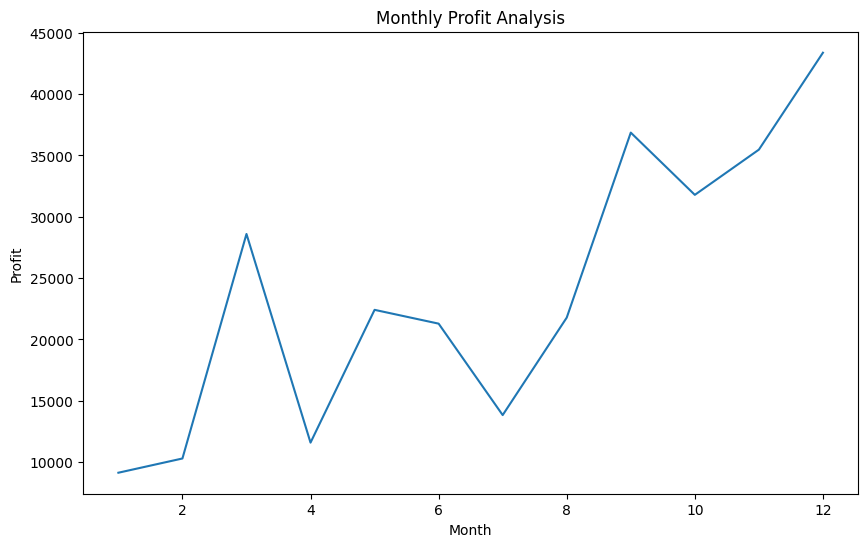

In [117]:
plt.figure(figsize=(10,6))
sns.lineplot(x='order_by_month', y='Profit', data=monthly_profit)
plt.title('Monthly Profit Analysis')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

In [84]:
profit_by_category=df.groupby('Category')['Profit'].sum().reset_index()
fig=px.pie(profit_by_category,names='Category',values='Profit',title='Profit by Category',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_font=dict(size=24))
fig.show()

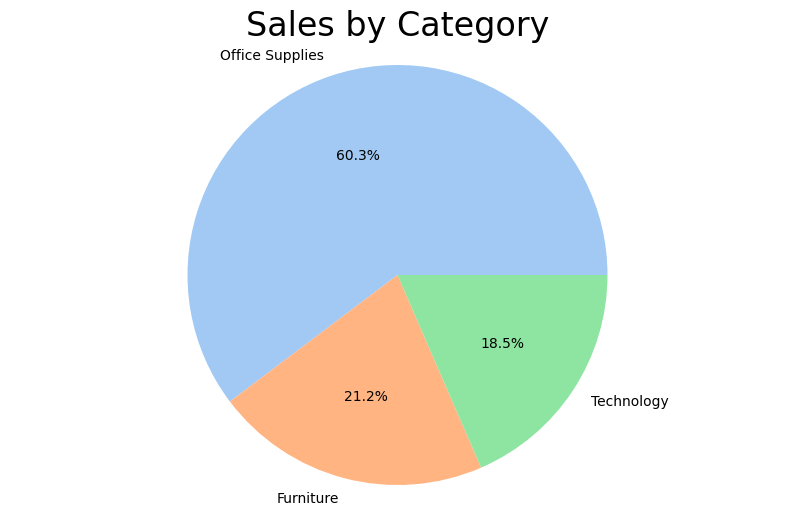

In [125]:
plt.figure(figsize=(10,6))
plt.pie(df['Category'].value_counts().values, labels=df['Category'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sales by Category', fontsize=24)
plt.axis('equal')
plt.show()

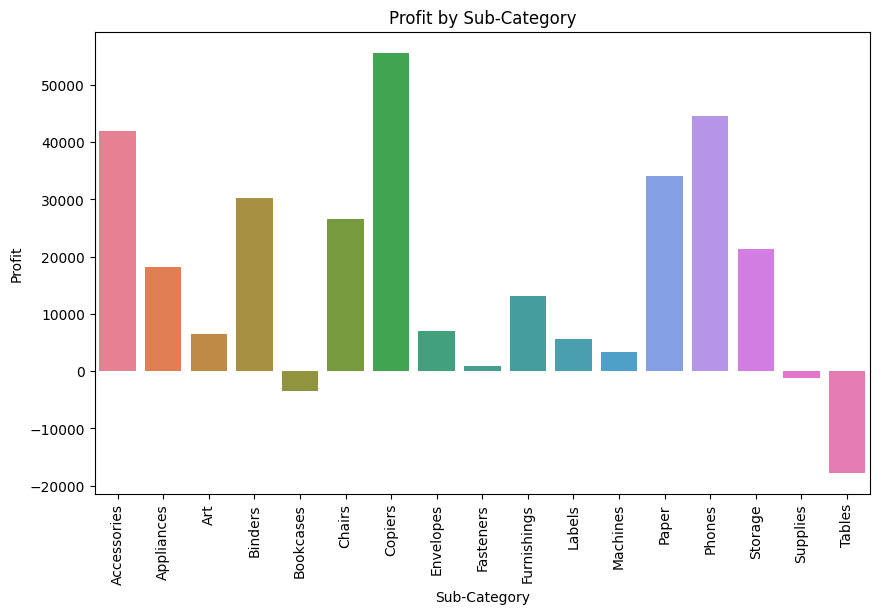

In [131]:
profit_by_subategory=df.groupby('Sub-Category')['Profit'].sum().reset_index()
plt.figure(figsize=(10,6))
fig=sns.barplot(x='Sub-Category',y='Profit',data=profit_by_subategory, hue='Sub-Category', legend=False)
fig.set_title('Profit by Sub-Category')
fig.set_xlabel('Sub-Category')
fig.set_ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

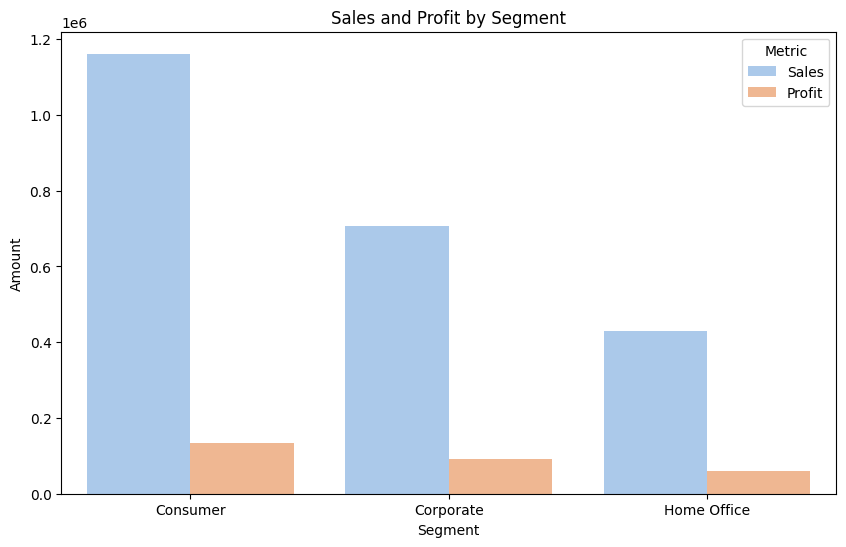

In [134]:
sale_profit_by_segment=df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()


sale_profit_melted = sale_profit_by_segment.melt(id_vars='Segment', var_name='Metric', value_name='Amount')

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Amount', hue='Metric', data=sale_profit_melted, palette='pastel')
plt.title('Sales and Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.show()

In [87]:
sales_to_profit_by_segment=df.groupby('Segment')[['Sales','Profit']].agg({'Sales':'sum',"Profit":'sum'}).reset_index()
sales_to_profit_by_segment['Sales_to_Profit_Ratio']=sales_to_profit_by_segment['Sales']/sales_to_profit_by_segment['Profit']
print(sales_to_profit_by_segment[['Segment',"Sales_to_Profit_Ratio"]])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
